# ITK in Python

## Overview

### Learning Objectives

* Becoming familiar with the Pythonic way of using ITK
* Understand how to use ITK object oriented interface
* Learn how to write simple Python code with ITK

## Two ways of using ITK in Python

* Pythonic way
 * Functional programming
 * More concise
 * Some functions and filters are not accessible this way
* Object oriented way
 * Full access to ITK

## Let's start the Pythonic way

In [2]:
import itk
from itkwidgets import view
from ipywidgets import interact, IntSlider

In [3]:
image = itk.imread("data/CBCT-TextureInput.png", itk.ctype('float'))
view(image)

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageF2; proxy of <Swig Object of type 'itkIma…

In [4]:
filtered_image = itk.median_image_filter(image, radius=2)

In [5]:
view(filtered_image)

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageF2; proxy of <Swig Object of type 'itkIma…

### Pythonic exercises

* In the example above, change the radius of the filter and observe the result.
* Replace filter with `mean_image_filter`
* Replace filter with `otsu_threshold_image_filter`
* Visualize results

Uncomment and change the radius of the filter and observe the result.

In [6]:
median_filtered_image = itk.median_image_filter(image, radius = 20)
view(median_filtered_image)

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageF2; proxy of <Swig Object of type 'itkIma…

In [7]:
#%load solutions/4_Using_ITK_in_Python_real_world_filters_median.py

Uncomment and replace filter with `mean_image_filter`

In [8]:
mean_filtered_image = itk.mean_image_filter(image, radius = 10)
view(mean_filtered_image)

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageF2; proxy of <Swig Object of type 'itkIma…

In [9]:
# %load solutions/4_Using_ITK_in_Python_real_world_filters_mean.py

Uncomment and replace filter with `otsu_threshold_image_filter`

In [10]:
otsu_filtered_image = itk.otsu_threshold_image_filter(image)
view(otsu_filtered_image)

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageSS2; proxy of <Swig Object of type 'itkIm…

In [11]:
# %load solutions/4_Using_ITK_in_Python_real_world_filters_otsu.py

## Object oriented

* Two types of C++ ITK objects
 * Smart pointers (hint: most ITK objects are)
 * "Simple" objects
* Translates in two ways of creating objects in Python
 * `obj = itk.SmartPointerObjectType.New()` (use auto-completion to see if `New()` method exists)
 * `obj = itk.SimpleObjectType()`

## Examples of objects

* With `New()` method:
 * `itk.Image`
 * `itk.MedianImageFilter`
* Without `New()` method:
 * `itk.Index`
 * `itk.RGBPixel`

## Templated types

* Is my ITK type templated? (hint: yes)

In [12]:
help(itk.Image)

Help on itkTemplate in module itkTemplate object:

itk::Image = class itkTemplate(builtins.object)
 |  This class manages access to available template arguments of a C++ class.
 |  
 |  This class is generic and does not give help on the methods available in
 |  the instantiated class. To get help on a specific ITK class, instantiate an
 |  object of that class.
 |  
 |  e.g.: median = itk.MedianImageFilter[ImageType, ImageType].New()
 |        help(median)
 |  
 |  There are two ways to access types:
 |  
 |  1. With a dict interface. The user can manipulate template parameters
 |  similarly to C++, with the exception that the available parameters sets are
 |  chosen at compile time. It is also possible, with the dict interface, to
 |  explore the available parameters sets.
 |  2. With object attributes. The user can easily find the available parameters
 |  sets by pressing tab in interperter like ipython
 |  
 |  Methods defined here:
 |  
 |  GetTypes(self)
 |      Helper method whi

* If so, you need to specify the data type
* This is similar to `dtype` in NumPy

In [13]:
import numpy
numpy.array([0,0], dtype=numpy.float)

array([0., 0.])

* Define and create a simple object

In [14]:
IndexType = itk.Index[3]
index = IndexType()
print(index)

itkIndex3 ([0, 0, 0])


* Define and use smart pointer object

In [15]:
ImageType = itk.Image[itk.ctype('float'), 2]
my_image = ImageType.New()
print(my_image)

Image (0x2e71ec0)
  RTTI typeinfo:   itk::Image<float, 2u>
  Reference Count: 1
  Modified Time: 798
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [0, 0]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [0, 0]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [0, 0]
  Spacing: [1, 1]
  Origin: [0, 0]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1 0
0 1

  PointToIndexMatrix: 
1 0
0 1

  Inverse Direction: 
1 0
0 1

  PixelContainer: 
    ImportImageContainer (0x2650790)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, float>
      Reference Count: 1
      Modified Time: 799
      Debug: Off
      Object Name: 
      Observers: 
        none
      Pointer: 0
      Container manages memory:

* Print list of available types

In [16]:
itk.Image.GetTypes()

<itkTemplate itk::Image>
Options:
  [<itkCType bool>, 2]
  [<itkCType bool>, 3]
  [<itkCType double>, 2]
  [<itkCType double>, 3]
  [<itkCType float>, 2]
  [<itkCType float>, 3]
  [<itkCType signed short>, 2]
  [<itkCType signed short>, 3]
  [<itkCType unsigned char>, 2]
  [<itkCType unsigned char>, 3]
  [<itkCType unsigned long long>, 2]
  [<itkCType unsigned long long>, 3]
  [<itkCType unsigned long>, 2]
  [<itkCType unsigned long>, 3]
  [<itkCType unsigned short>, 2]
  [<itkCType unsigned short>, 3]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD2'>, 2]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD2'>, 3]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD3'>, 2]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD3'>, 3]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD4'>, 2]
  [<class 'itkCovariantVectorPython.itkCovariantVectorD4'>, 3]
  [<class 'itkCovariantVectorPython.itkCovariantVectorF2'>, 2]
  [<class 'itkCovariantVectorPython.itkCovariantVec

## Non-templated types

* `MetaDataDictionary`

In [17]:
d = itk.MetaDataDictionary()
d['new_key'] = 5
print("'new_key' value: %d" % d['new_key'])

'new_key' value: 5


### Note for C++ developers
* If the type required using a smart pointer in C++
 * Use the method `New()` to create the object.
 * Objects are allocated on the heap.
 * C++ class has `Pointer` type and `New()` method defined ([see doxygen documentation](https://itk.org/Insight/Doxygen/html/index.html)) 
* If it was not a smart pointer (e.g. `itk.Index`)
 * use `()`
 * Allocated on the stack.

## Filters with object oriented syntax

In [18]:
PixelType = itk.ctype('float')
image = itk.imread("data/CBCT-TextureInput.png", PixelType)
ImageType = itk.Image[PixelType, 2]
median_filter = itk.MedianImageFilter[ImageType, ImageType].New()
median_filter.SetInput(image)
median_filter.SetRadius(4)
median_filter.Update()
view(median_filter.GetOutput())

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageF2; proxy of <Swig Object of type 'itkIma…

### Object exercises

* In the example above, change the radius of the filter and observe the result.
* Replace filter with `MeanImageFilter`
* Replace filter with `OtsuThresholdImageFilter`
* Visualize results

Uncomment and change the radius of the filter and observe the result.

In [19]:
median_filter = itk.MedianImageFilter[ImageType, ImageType].New()
median_filter.SetInput(image)
median_filter.SetRadius(5)
median_filter.Update()
median_filtered_image = median_filter.GetOutput()
view(median_filtered_image)

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageF2; proxy of <Swig Object of type 'itkIma…

In [20]:
# %load solutions/4_Using_ITK_in_Python_real_world_filters_MedianFilter.py

Uncomment and edit to use `MeanImageFilter`

In [21]:
mean_filter = itk.MeanImageFilter[ImageType, ImageType].New()
mean_filter.SetInput(image)
mean_filter.SetRadius(10)
mean_filter.Update()
mean_filtered_image = mean_filter.GetOutput()
view(mean_filtered_image)

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageF2; proxy of <Swig Object of type 'itkIma…

In [22]:
# %load solutions/4_Using_ITK_in_Python_real_world_filters_MeanFilter.py

Uncomment and replace filter with `OtsuThresholdImageFilter`

In [23]:
InputImageType = itk.Image[itk.ctype('float'), 2]
OutputImageType = itk.Image[itk.ctype('short'), 2]
otsu_filter = itk.OtsuThresholdImageFilter[InputImageType, OutputImageType].New()
otsu_filter.SetInput(image)
otsu_filter.Update()
otsu_filtered_image = otsu_filter.GetOutput()
view(otsu_filtered_image)

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageSS2; proxy of <Swig Object of type 'itkIm…

In [24]:
# %load solutions/4_Using_ITK_in_Python_real_world_filters_OtsuFilter.py

## ITK object summary
* Has `New()` method?
* Is templated?
* Call `Update()` with filters!

## Automatic type deduction

* Often the filter type can automatically be deduced from the input of the filter:

In [25]:
image = itk.imread("data/itk-logo.png", itk.F)
# Filter types deduced from the image type.
median_filter = itk.MedianImageFilter.New(image, radius = 3)
median_filter.Update()
view(median_filter.GetOutput())

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageF2; proxy of <Swig Object of type 'itkIma…

* Note the absence of image type

### Type deduction exercises

* Using the previous `MeanImageFilter` exercise, use the type deduction method to instantiate filter.
* Using the previous `OtsuThresholdImageFilter` exercise, use the type deduction method to instantiate filter.
* What is the image type of the `OtsuThresholdImageFilter` output?

* Use the type deduction method to instantiate filter.

In [26]:
mean_filter = itk.MeanImageFilter.New(image, radius=5)
mean_filter.Update()
mean_filtered_image = mean_filter.GetOutput()
view(mean_filtered_image)

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageF2; proxy of <Swig Object of type 'itkIma…

In [27]:
# %load solutions/4_Using_ITK_in_Python_real_world_filters_MeanFilter-TypeDeduction.py

* Using the previous `OtsuThresholdImageFilter` exercise, use the type deduction method to instantiate filter.
* What is the image type of the `OtsuThresholdImageFilter` output?

In [28]:
otsu_filter = itk.OtsuThresholdImageFilter.New(image)
otsu_filter.Update()
otsu_filtered_image = otsu_filter.GetOutput()
view(otsu_filtered_image)

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageSS2; proxy of <Swig Object of type 'itkIm…

In [29]:
# %load solutions/4_Using_ITK_in_Python_real_world_filters_OtsuFilter-TypeDeduction.py

## Simplify your code (and your life)

### Objects accessible by index (non exhaustive)
* MetaDataDictionary
* Index
* Point
* Vector
* Size

In [30]:
# Create an `Index` of dimension 3
index = itk.Index[3]()
index[0]=1
print("index value at position 0: %d"%index[0])

index value at position 0: 1


* Matrix is not, but you can get values with `()`

In [31]:
# Create a 3x3 `Matrix` of type float
m = itk.Matrix[itk.F,3,3]()
print("Value at coordinate 0,0: %f" % m(0,0))

Value at coordinate 0,0: 0.000000


* `itk.VariableLengthVector[itk.D]()` is neither.
* Need to set and get values using the `SetElement` and `GetElement` methods.

In [32]:
# Create a `VariableLengthVector of type `double` and initialize size to `1`
v = itk.VariableLengthVector[itk.D](1)
v.SetElement(0,1)
print("Value at coordinate 0,0: %f" % v.GetElement(0))

Value at coordinate 0,0: 1.000000


### Use Python objects instead of ITK objects

* Some filters expect inputs of a certain type

In [33]:
image = ImageType.New()
help(image.SetOrigin)

Help on method itkImageBase2_SetOrigin in module _itkImagePython:

itkImageBase2_SetOrigin(...) method of itkImagePython.itkImageF2 instance
    SetOrigin(itkPointD2 _arg)
    SetOrigin(double const * origin)
    itkImageBase2_SetOrigin(itkImageBase2 self, float const * origin)
    
    Set the origin of the
    image. The origin is the geometric coordinates of the image origin
    (pixel [0,0]). It is stored internally as SpacePrecisionType but may
    be set from float or double. See:   GetOrigin()



* Use Python `list` instead (for `Index`, `Point`, `Vector`)

In [34]:
image.SetOrigin([2,10])
print("Image origin: %s" % str(image.GetOrigin()))

Image origin: itkPointD2 ([2, 10])


## Appendix

### Functions to know
* `itk.imread(file_name [, pixel_type])`
* `itk.imwrite(image, file_name [, compression])`
* `itk.array_from_image(image)` and `itk.array_view_from_image(image)`
* `itk.image_from_array(arr)` and `itk.image_view_from_array(arr)`

### Pixel types - Two options
* itk.ctype('float'), itk.ctype('unsigned char')
* itk.F, itk.UC

### Convenience functions
* `itk.size(image)`
* `itk.spacing(image)`
* `itk.origin(image)`
* `itk.index(image)`
* `itk.physical_size(image)`

## Fixing errors

### Unsupported (image) types
* typical error message:

KeyError: "itkTemplate : No template [<class 'itkImagePython.itkImageD2'>] for the itk::ImageFileReader class"

In [35]:
image = itk.imread("data/BrainProtonDensitySlice.png", itk.UC)
print(image)

Image (0x410b510)
  RTTI typeinfo:   itk::Image<unsigned char, 2u>
  Reference Count: 1
  Modified Time: 2616
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 2460
  UpdateMTime: 2615
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [181, 217]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [181, 217]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [181, 217]
  Spacing: [1, 1]
  Origin: [0, 0]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1 0
0 1

  PointToIndexMatrix: 
1 0
0 1

  Inverse Direction: 
1 0
0 1

  PixelContainer: 
    ImportImageContainer (0x1aaa740)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned char>
      Reference Count: 1
      Modified Time: 2612
      Debug: Off
      Object Name: 
      Observers: 
        none
      Pointe

* Select different input image type:

In [36]:
image = itk.imread("data/itk-logo.png", itk.F)

* Cast to a different image type:

In [37]:
InputImageType = itk.Image[itk.F, 2]
OutputImageType = itk.Image[itk.UC, 2]
cast_filter = itk.CastImageFilter[InputImageType, OutputImageType].New(image)
cast_filter.Update()

* Converting a NumPy array with too many components along one dimension:
 * Use `itk.VectorImage`
 * Save it using `itk.imwrite()`

## Create your own pipeline

* Why?
 * Create a pipeline in a Python function.
 * Return the last filter output without updating it.
 * Error: Not be able to run the pipeline outside of the function.

* This does not work:

In [38]:
  def generateSource():
    reader = itk.ImageReader[ImageType].New()
    ...
    itkToVtkFilter = itk.ImageToVTKImageFilter[ImageType].New()
    itkToVtkFilter.SetInput(reader.GetOutput())
    return itkToVtkFilter.GetImporter()
 
  def main():
    source = generateSource()
    source.Update()

* Instead, you can create a pipeline, and use it where convenient:

In [39]:
def my_func(ImageType):
    my_pipeline = itk.pipeline()
    mean_filter = itk.MeanImageFilter[ImageType, ImageType].New()
    my_pipeline.connect(mean_filter)
    my_pipeline.expose("Radius")
    threshold_filter = itk.ThresholdImageFilter[ImageType].New()
    my_pipeline.connect(threshold_filter)
    my_pipeline.expose("Lower")
    return my_pipeline

PixelType = itk.UC
ImageType = itk.Image[PixelType, 2]
image = itk.imread("data/CBCT-TextureInput.png", PixelType)

my_pipeline = my_func(ImageType)
my_pipeline.SetInput(image)
my_pipeline.SetRadius(5)
my_pipeline.SetLower(100)
my_pipeline.Update()

view(my_pipeline.GetOutput())

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageUC2; proxy of <Swig Object of type 'itkIm…

## Very Advanced topic

* disable lazy loading:

In [40]:
itk.force_load()

* call_back while importing ITK

In [2]:
import itk
itk.auto_progress(True)
itk.force_load()
itk.auto_progress(False)

* Cast and downcast ITK objects

In [3]:
ImageType = itk.Image[itk.F, 2]
filter = itk.MedianImageFilter[ImageType, ImageType].New()
casted_filter = itk.ProcessObject.cast(filter)
itk.down_cast(casted_filter)

<itkMedianImageFilterPython.itkMedianImageFilterIF2IF2; proxy of <Swig Object of type 'itkMedianImageFilterIF2IF2 *' at 0x7feed075d060> >

# NumPy and scikit-learn interactions

* ITK is great at reading and processing images
* ITK does not show images
* Some algorithms are not available in ITK
* NumPy is great at processing arrays in simple ways
* NumPy arrays can be read by many other Python packages
    * matplotlib
    * scikit-learn

Let's convert an ITK image to a NumPy array

* Load an image with ITK
* Convert the image to a NumPy array
* Check some values in the image

In [4]:
import itk
from itkwidgets import view
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
im=itk.imread("data/itk-logo.png")
arr=itk.array_from_image(im)
print(arr[1,1])


[0 0 0 0]


Let go the other way around: NumPy array to an ITK image. First, we create an array with some values.

In [6]:
def make_gaussian(size, fwhm = 3, center=None):
    """ Make a square gaussian kernel.

    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = np.arange(0, size, 1, np.float32)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)


arr = make_gaussian(11)


Let's look at the array. We use matplotlib to do this.

(-0.5, 10.5, 10.5, -0.5)

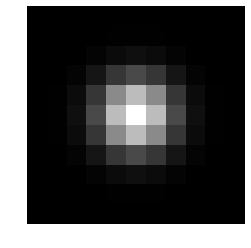

In [7]:
plt.gray()
plt.imshow(arr)
plt.axis('off')

And now, let's convert it to an ITK image.

In [8]:
im = itk.image_view_from_array(arr)

We can now look at pixel values...

In [9]:
im.GetPixel([5,5])

1.0

 or call any ITK filter on the image.

In [10]:
filtered_image=itk.median_image_filter(im, radius=[2,2])

We can compare some pixel values to see the effect of the filter.

In [11]:
print("Original image pixel value: %f"%im.GetPixel([5,5]))
print("Filtered image pixel value: %f"%filtered_image.GetPixel([5,5]))

Original image pixel value: 1.000000
Filtered image pixel value: 0.291632


Let's modify a pixel in our image, and look at the original array.

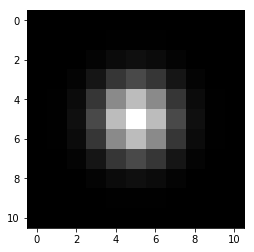

In [12]:
im.SetPixel([5,5], 0)
plt.imshow(arr)


Now let's load an image and show it with matplotlib.

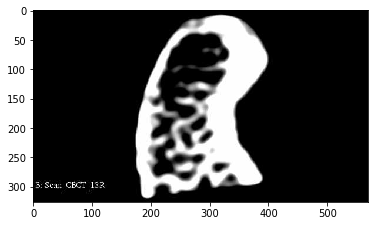

In [13]:
im=itk.imread("data/CBCT-TextureInput.png", itk.UC)
arr = itk.array_view_from_image(im)
plt.imshow(arr)

We can modify a value in the array and look at the value of this pixel in the image.

In [14]:
print("Original image pixel value:%d"%im.GetPixel([270,270]))
arr[270,270] = 0
print("Modified image pixel value:%d"%im.GetPixel([270,270]))

Original image pixel value:146
Modified image pixel value:0


## Views vs copy

So far we have used `itk.array_view_from_image()` and `itk.image_view_from_array()`. You can see the keyword `view` in both the names of these functions.

Let's compare the result of `itk.array_view_from_image()` and `itk.array_from_image()`

Text(0.5, 1.0, 'Copy')

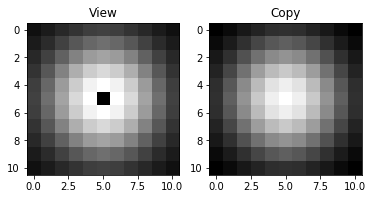

In [15]:
gaussian=itk.gaussian_image_source(Size=11, Sigma=3, Scale=100, Mean=[5,5])
arr_view_gaussian = itk.array_view_from_image(gaussian)
arr_gaussian = itk.array_from_image(gaussian)
gaussian.SetPixel([5,5],0)
plt.subplot(1, 2, 1)
plt.imshow(arr_view_gaussian)
plt.title("View")
plt.subplot(1, 2, 2)
plt.imshow(arr_gaussian)
plt.title("Copy")

The `view` functions does not copy the memory. It shares the same information. In some cases, it is better not to copy the memory (speed, memory limitation). In other cases, it is better to copy the memory (original image needs to be used later)

Copies and views work in both directions: From NumPy to ITK and from ITK to NumPy.

In [16]:
im = itk.image_from_array(arr_gaussian)
im_view = itk.image_view_from_array(arr_gaussian)
arr_gaussian[5,5] = 0
view(im)

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageSS2; proxy of <Swig Object of type 'itkIm…

In [17]:
view(im_view)

Viewer(gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageSS2; proxy of <Swig Object of type 'itkIm…

## Exercises

### Exercise 1: Visualize an image
* Read an image with ITK
* Apply a filter
* Show both original image and filtered images with matplotlib

In [18]:
# %load solutions/4_ITK_and_NumPy_answers_Exercise1.py

### Exercise 2: ITK image to NumPy array

* Read an image with ITK
* Convert image to NumPy array
* Modify a pixel in the image
* Has the array been modified?
* Why did you make that choice?

In [19]:
# %load solutions/4_ITK_and_NumPy_answers_Exercise2.py

# ITK Image and NumPy array index order

Let's look at the size of an ITK image and the size of a NumPy array.

In [20]:
im=itk.imread("data/CBCT-TextureInput.png", itk.UC)
arr = itk.array_view_from_image(im)
print("Image size: " + str(itk.size(im)))
print("Array size: " + str(arr.shape))

Image size: itkSize2 ([570, 326])
Array size: (326, 570)


The sizes appear to be inverted!

Let's see what happens if we get the value of a point at a certain location.

In [21]:
print("Pixel value at image location [300,240]:" + str(im.GetPixel([300,240])))
print("Pixel value at array location [300,240]:" + str(arr[300,240]))
print("Pixel value at array location [240,300]:" + str(arr[240,300]))

Pixel value at image location [300,240]:241
Pixel value at array location [300,240]:254
Pixel value at array location [240,300]:241


Indeed, it is inverted. Why?

ITK and NumPy use the opposite convention for their indices order. It is not important when you use filters and work on the image as a whole. The algorithms are aware of the order if they need to.

Could the ITK axes order be kept when converting an image to an array?

Yes. An option is being added to the function `itk.array_from_image()` to keep the axis order.
When *keepAxes* is *False* (default), the NumPy array will have C-order indexing.
This is the reverse of how indices are specified in ITK, i.e. k,j,i versus i,j,k.
However C-order indexing is expected by most algorithms in NumPy / SciPy.

# scikit-learn

* scikit-learn is a machine learning package in Python.
* It is used to illustrate solving a problem using ITK and NumPy arrays.

In [22]:
import sklearn

First, we load 10 2D-images of circles with different radii and center position to which some noise has been added, and their corresponding ground truth segmentations.

Text(0.5, 1.0, 'Image')

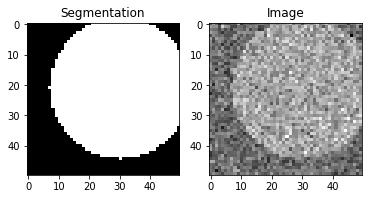

In [23]:
l_label=[]
l_im=[]
for i in range(0,10):
    imageName='data/sklearn/im%d.nrrd'%i
    im=itk.imread(imageName,itk.F)
    arr = itk.array_from_image(im)
    l_im.append(arr)
    labelName='data/sklearn/im%d_label.nrrd'%i
    im=itk.imread(labelName,itk.UC)
    arr = itk.array_from_image(im)
    l_label.append(arr)
size=itk.size(im)
plt.subplot(1, 2, 1)
plt.imshow(l_label[0])
plt.title("Segmentation")
plt.subplot(1, 2, 2)
plt.imshow(l_im[0])
plt.title("Image")

The goal is to find the segmentation based on the input image.

We create arrays of data:
* X - the input samples
* Y - the target values

In [24]:
X0=l_im[0].flatten()
X=X0
Y=l_label[0].flatten()
for i in range(1,10):
    X=np.concatenate((X, l_im[i].flatten()))
    Y=np.concatenate((Y, l_label[i].flatten()))

* We use a supervised learning methods based on applying Bayes’ theorem.
* The only information provided to the algorithm is the image intensity value.

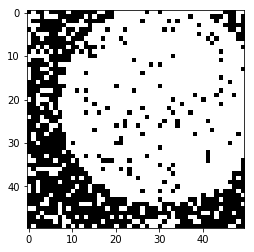

In [25]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X.reshape(-1,1), Y)
result=clf.predict(X0.reshape(-1,1)).reshape(size[0],size[1])
plt.imshow(result)

To improve our segmentation, we filter the input image with a median image filter and add this information as a second sample vector.

In [26]:
l_median=[]
for i in range(0,10):
    imageName='data/sklearn/im%d.nrrd'%i
    im=itk.imread(imageName,itk.F)
    median=itk.median_image_filter(im, radius=3)
    arr = itk.array_from_image(median)
    l_median.append(arr)

M0=l_median[0].flatten()
M=M0
X0=np.concatenate((X0.reshape(-1,1),M0.reshape(-1,1)), axis=1)
for i in range(1,10):
    M=np.concatenate((M, l_median[i].flatten()))

X = np.concatenate((X.reshape(-1,1),M.reshape(-1,1)), axis=1)

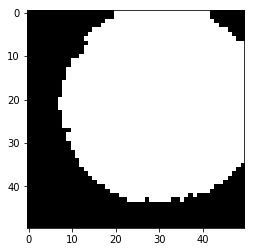

In [27]:
clf.fit(X, Y)
result=clf.predict(X0).reshape(50,50)
plt.imshow(result)

## Typical processing

* Image preprocessing
    * Bias field correction (n4_bias_field_correction_image_filter)
    * Noise reduction (smoothing_recursive_gaussian_image_filter)
    * Feature computation (Texture, Wavelet, Edge detector)
* Converting ITK data to NumPy and organizing the data as needed
* Train classifier
* Use classifier on new data
* Convert classifier result to ITK data
* Apply some post processing filters
    * Fill holes (binary_fillhole_image_filter)
    * Smoothing (median_image_filter)

### Enjoy ITK!